# Curse of dimensionality

Here is a function that depends on time *t* and 3 other parameters.

In this example class, we generate many samples of the function and then try to build an interpolator that approximates this function as accurately as possible.

You can think of this function as a time series that depends on parameters *a*, *b*, *c*.

In this problem class, we will assume the ranges of the parameters are:

- \(0 < a < 1\)
- \(-0.5 < b < 0.5\)
- \(5 < c < 10\)

When not varied, we will fix the values to \(a = 0.1\), \(b = -0.13\), \(c = 9\).

We will always assume time \(t\) is between 0 and 1. Our time grid is:

```python
t = np.linspace(0, 1, 100)
```
, unless otherwise requested.

In [1]:
from scipy.interpolate import interp1d
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

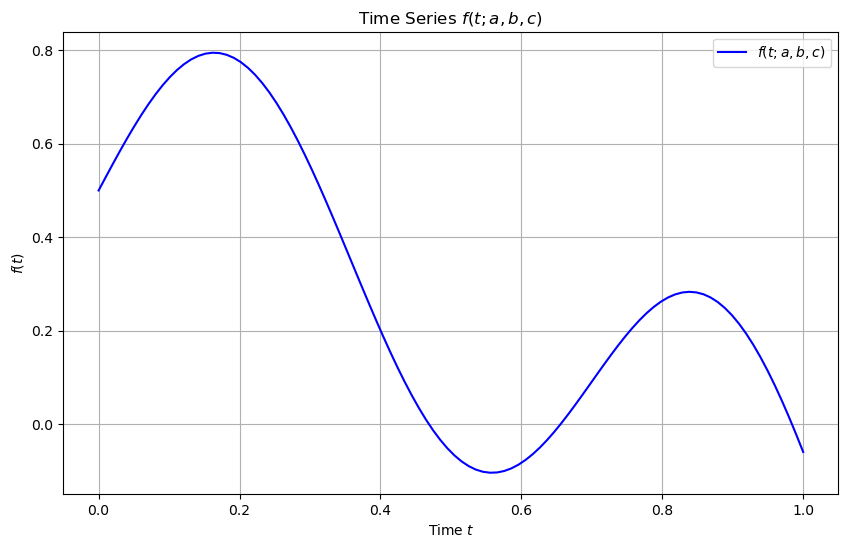

In [2]:
def f(t, a, b, c):
    return np.sqrt(a) * np.exp(-b * t) * np.sin(c * t) + 0.5 * np.cos(2 * t)

# Example usage
# Define parameters
a = 0.1
b = -0.13
c = 9


# Define time range
t = np.linspace(0, 1, 100)  # time from 0 to 1 with 100 points

# Calculate f(t) for these parameters
f_values = f(t, a, b, c)

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(t, f_values, label=r'$f(t; a, b, c)$', color='blue')
plt.xlabel('Time $t$')
plt.ylabel(r'$f(t)$')
plt.title(r'Time Series $f(t; a, b, c)$')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
def plot_with_parameters(a, b, c):
    # Define time range
    t = np.linspace(0, 1, 100)

    # Calculate f(t) for these parameters
    f_values = f(t, a, b, c)

    # Plot the function
    plt.figure(figsize=(10, 6))
    plt.plot(t, f_values, label=r'$f(t; a, b, c)$', color='blue')
    plt.xlabel('Time $t$')
    plt.ylabel(r'$f(t)$')
    plt.title(r'Time Series $f(t; a, b, c)$')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create interactive widget
interactive_plot = widgets.interactive(
    plot_with_parameters,
    a=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.1),
    b=widgets.FloatSlider(min=-0.5, max=0.5, step=0.01, value=-0.13),
    c=widgets.FloatSlider(min=5, max=10, step=0.1, value=9)
)

display(interactive_plot)

interactive(children=(FloatSlider(value=0.1, description='a', max=1.0, step=0.01), FloatSlider(value=-0.13, de…

The goal of this problem class is to sample this function across all its parameter space and create interpolators.

You should aim to understand the limitations of interpolation and how to deal with this very important problem.

## Question 1, 2, 3 and 4:   
Consider all parameter values (except t) are fixed and create an interpolator with respect to time .

You use the original grid for the interpolation. 

Then, evaluate the interpolator on a much finer grid than the original t grid.

Show both the exact function and the predictions of the interpolator.

Show the ratio of the interpolated values to true values accross the fine time grid.

What do you observe? Does it make sense?

In [4]:
def create_time_interpolator(a=0.1, b=-0.13, c=9, n_points=100):
    # Define time grid
    t = np.linspace(0, 1, n_points)
    
    # Calculate function values on the grid
    f_values = f(t, a, b, c)
    
    # Create interpolator (using cubic spline interpolation)
    f_interpolator = interp1d(t, f_values, kind='cubic')
    
    return f_interpolator, t, f_values

def plot_comparison_with_ratio(n_interp_points=100, n_test_points=200):
    # Create interpolator
    f_interp, t_orig, f_orig = create_time_interpolator(n_points=n_interp_points)
    
    # Test points
    t_test = np.linspace(0, 1, n_test_points)
    f_exact = f(t_test, a, b, c)
    f_interpolated = f_interp(t_test)
    
    # Calculate error and ratio
    error = np.abs(f_exact - f_interpolated)
    ratio = f_interpolated / f_exact
    max_error = np.max(error)
    
    # Create figure with three subplots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12), height_ratios=[3, 1, 1])
    
    # Plot comparison
    ax1.plot(t_test, f_exact, 'b-', label='Exact', linewidth=2)
    ax1.plot(t_test, f_interpolated, 'r--', label='Interpolated', linewidth=2)
    ax1.plot(t_orig, f_orig, 'ko', label='Interpolation points', markersize=4)
    ax1.set_xlabel('Time $t$')
    ax1.set_ylabel(r'$f(t)$')
    ax1.set_title(f'Comparison of Exact vs Interpolated Function\nMax Error: {max_error:.2e}')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot error
    ax2.plot(t_test, error, 'g-', label='Interpolation Error')
    ax2.fill_between(t_test, 0, error, alpha=0.3, color='g')
    ax2.set_xlabel('Time $t$')
    ax2.set_ylabel('Error')
    ax2.set_title('Interpolation Error')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Plot ratio
    ax3.plot(t_test, ratio, 'r-', label='Interpolated/Exact Ratio')
    ax3.axhline(y=1, color='k', linestyle='--', alpha=0.5)
    ax3.set_xlabel('Time $t$')
    ax3.set_ylabel('Ratio')
    ax3.set_title('Ratio of Interpolated to Exact Values')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return max_error

# Create interactive widgets
interp_points_slider = widgets.IntSlider(
    value=100,
    min=10,
    max=500,
    step=10,
    description='Interpolation Points:',
    style={'description_width': 'initial'}
)

test_points_slider = widgets.IntSlider(
    value=200,
    min=50,
    max=1000,
    step=50,
    description='Test Points:',
    style={'description_width': 'initial'}
)

# Create interactive plot
widgets.interactive(plot_comparison_with_ratio, 
                   n_interp_points=interp_points_slider,
                   n_test_points=test_points_slider)

interactive(children=(IntSlider(value=100, description='Interpolation Points:', max=500, min=10, step=10, styl…

This is not very surprising. When the exact value approaches zero, even tiny absolute errors can cause large ratios. It is interesting to look at the interpolation error, which is small but occillatory patterns can indicate periodic behaviours in the absolute error of the cubic spline interpolator. Particularly, errors are large towards the end of the time grid.

# Question 5

Consider now all parameters fixed except \(a\) (and \(t\)).

We assume the parameter \(a\) can take values between 0 and 1.

Generate 10 samples of \(f\) (i.e., 10 time series) corresponding to linearly spaced values of \(a\) spanning the interval.

Store them in a `pandas` DataFrame and plot them with the `plot` method of the DataFrame.

<Figure size 1200x600 with 0 Axes>

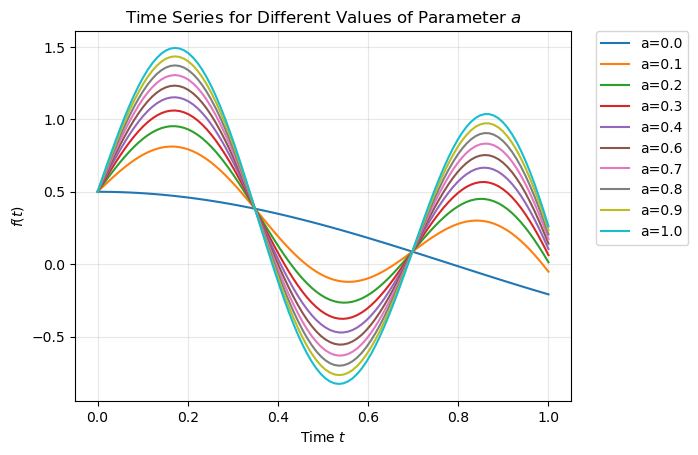

In [5]:
# Generate time grid
t = np.linspace(0, 1, 100)

# Generate linearly spaced values for parameter a
a_values = np.linspace(0, 1, 10)

# Fixed parameters
b = -0.13
c = 9

# Create DataFrame
df = pd.DataFrame(index=t)

# Generate time series for each value of a
for a in a_values:
    f_values = f(t, a, b, c)
    df[f'a={a:.1f}'] = f_values

# Plot all time series
plt.figure(figsize=(12, 6))
ax = df.plot(legend=True)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Time $t$')
plt.ylabel('$f(t)$')
plt.title('Time Series for Different Values of Parameter $a$')
plt.grid(True, alpha=0.3)
plt.show()

# Question 6

Create an interpolator that interpolates over \(a\) (same range as the previous question) and returns the full time series (i.e., values of \(f\) for all time points) over the original time grid, i.e., \(t\).

```python
t = np.linspace(0, 1, 100)
```

- Plot the result for \(a = 0.125\), like in question 3.

- Plot the ratio, like in question 4.

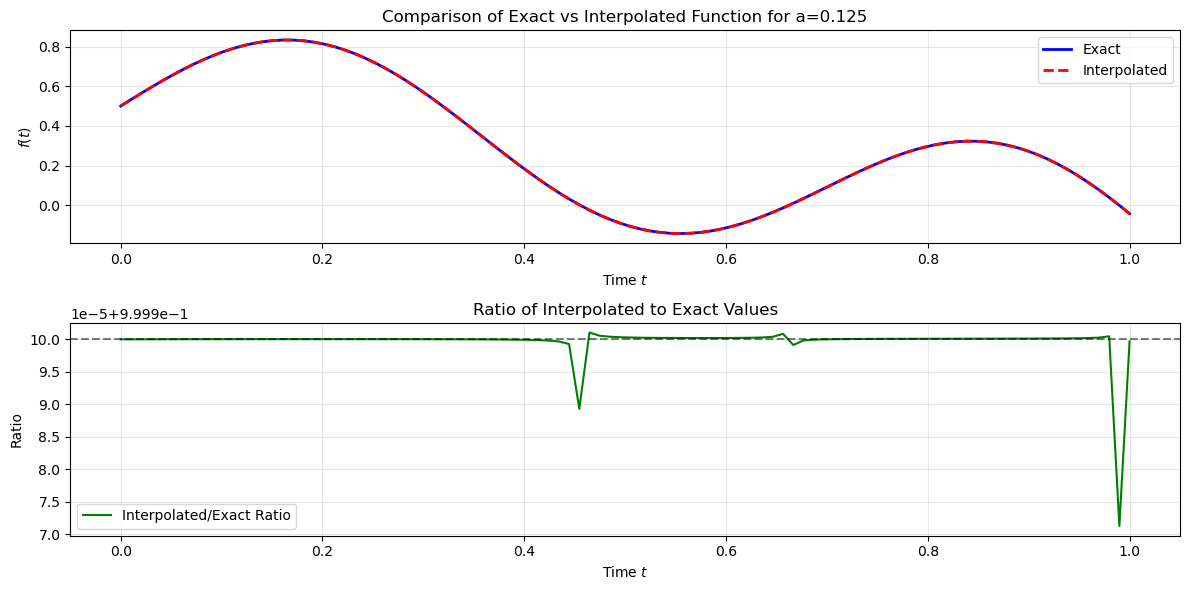

In [6]:
# Create interpolator function - optimized version
def create_a_interpolator(n_samples=100):
    # Time grid
    t = np.linspace(0, 1, 100)
    
    # Parameter range for a
    a_samples = np.linspace(0, 1, n_samples)
    
    # Pre-allocate array and compute all values at once
    t_mesh, a_mesh = np.meshgrid(t, a_samples)
    f_samples = f(t_mesh, a_mesh, b, c)
    
    # Create single interpolator for all time points
    interpolator = interp1d(a_samples, f_samples, axis=0, kind='cubic')
    
    return interpolator

# Create interpolator and test it
f_interp = create_a_interpolator(n_samples=100)
a_test = 0.125

# Get interpolated and exact values
f_interpolated = f_interp(a_test)
f_exact = f(t, a_test, b, c)

# Calculate ratio
ratio = f_interpolated / f_exact

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

# Plot comparison of exact vs interpolated
ax1.plot(t, f_exact, 'b-', label='Exact', linewidth=2)
ax1.plot(t, f_interpolated, 'r--', label='Interpolated', linewidth=2)
ax1.set_xlabel('Time $t$')
ax1.set_ylabel('$f(t)$')
ax1.set_title(f'Comparison of Exact vs Interpolated Function for a={a_test}')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot ratio
ax2.plot(t, ratio, 'g-', label='Interpolated/Exact Ratio')
ax2.axhline(y=1, color='k', linestyle='--', alpha=0.5)
ax2.set_xlabel('Time $t$')
ax2.set_ylabel('Ratio')
ax2.set_title('Ratio of Interpolated to Exact Values')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Question 7

Use `widgets` from `ipywidgets` to create a sliding scale of \(a\) values.

In this question, you should plot the ratio between the interpolated values and the true values of the function evaluated at the original time grid \(t\).


--- 

# Question 8

From your results of Question 7, what do you observe? Does it make sense?



In [7]:
def plot_comparison_with_ratio_a(a_value):
    # Get interpolated and exact values
    f_interp = create_a_interpolator(100)  # Fixed number of samples
    f_exact = f(t, a_value, b, c)

    # Calculate ratio
    f_interpolated = f_interp(a_value)
    ratio = f_interpolated / f_exact
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    
    # Plot comparison of exact vs interpolated
    ax1.plot(t, f_exact, 'b-', label='Exact', linewidth=2)
    ax1.plot(t, f_interpolated, 'r--', label='Interpolated', linewidth=2)
    ax1.set_xlabel('Time $t$')
    ax1.set_ylabel('$f(t)$')
    ax1.set_title(f'Comparison of Exact vs Interpolated Function for a={a_value:.3f}')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot ratio
    ax2.plot(t, ratio, 'g-', label='Interpolated/Exact Ratio')
    ax2.axhline(y=1, color='k', linestyle='--', alpha=0.5)
    ax2.set_xlabel('Time $t$')
    ax2.set_ylabel('Ratio')
    ax2.set_title('Ratio of Interpolated to Exact Values')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Create the interpolator with fixed number of samples
f_interp = create_a_interpolator(100)

# Create slider widget
a_slider = widgets.FloatSlider(
    value=0.125,
    min=0,
    max=1,
    step=0.01,
    description='a:',
    continuous_update=False,
    readout_format='.3f'
)

# Create interactive plot
widgets.interactive(plot_comparison_with_ratio_a, a_value=a_slider)

interactive(children=(FloatSlider(value=0.125, continuous_update=False, description='a:', max=1.0, readout_for…

The ratio is at 1 when a = 0 or a = 1. At a = 0, the ratio is very stable because the function never gets too close to zero.  The ratio plots show spikes at points where the function crosses or approaches zero, which makes mathematical sense. The y-axis scale of the ratio plots changes dramatically (from 1e-7+1 to 1e-9+1) as a increases, showing improving accuracy as a increases.

# Question 9

We will now consider both \(a\) and \(b\) as interpolation parameters.

Our interpolator should therefore interpolate across both \(a\) and \(b\) ranges.

Generate \(10^2\) parameter value pairs \((a, b)\) in the range \(0 < a < 1\) and \(-0.5 < b < 0.5\) using **Latin hypercube sampling**.

- You should use `pyDOE` to generate the Latin Hypercube samples.
- You may need to install the package using:

```bash
pip install pyDOE
```

Show the a and b samples as a 2D scatter plot.

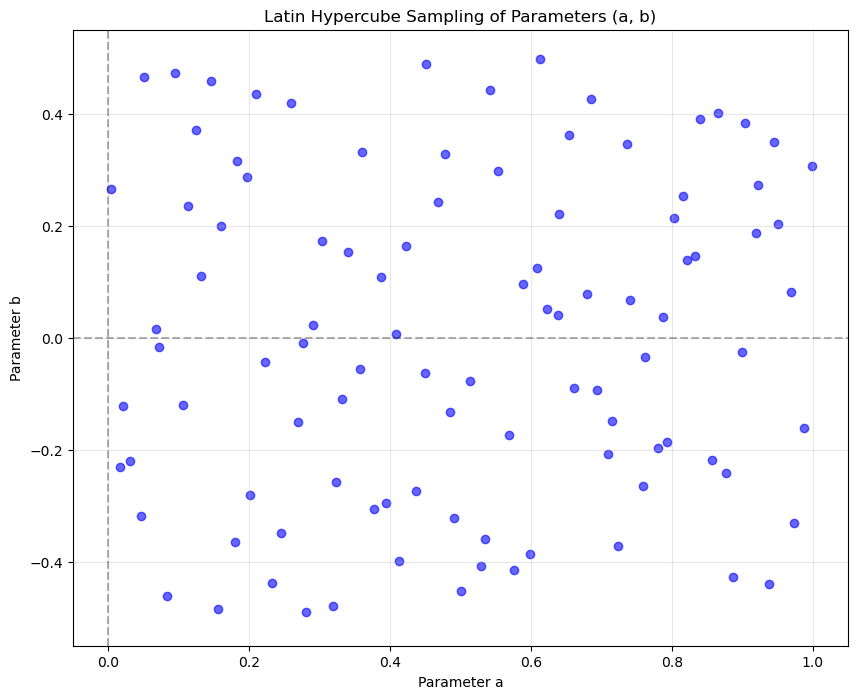

In [8]:
from pyDOE import lhs
np.random.seed(42)
# Generate Latin Hypercube samples
n_samples = 100  # 10^2 samples
samples = lhs(2, samples=n_samples)  # 2 parameters (a and b)

# Scale samples to the desired ranges
a_samples = samples[:, 0] * 1.0        # Scale to [0, 1]
b_samples = samples[:, 1] * 1.0 - 0.5  # Scale to [-0.5, 0.5]

# Create scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(a_samples, b_samples, c='blue', alpha=0.6)
plt.xlabel('Parameter a')
plt.ylabel('Parameter b')
plt.title('Latin Hypercube Sampling of Parameters (a, b)')
plt.grid(True, alpha=0.3)

# Add range indicators
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)

# Set axis limits with some padding
plt.xlim(-0.05, 1.05)
plt.ylim(-0.55, 0.55)

plt.show()

# Question 10

For comparison, on the same plot, add a uniformly sampled realization of \(10^2\) \(a\) and \(b\) values.

Can you distinguish by eye?

As an extension question, think of how you would proceed if you needed to prove that these samples come from different generative processes (uniform or Latin Hypercube).


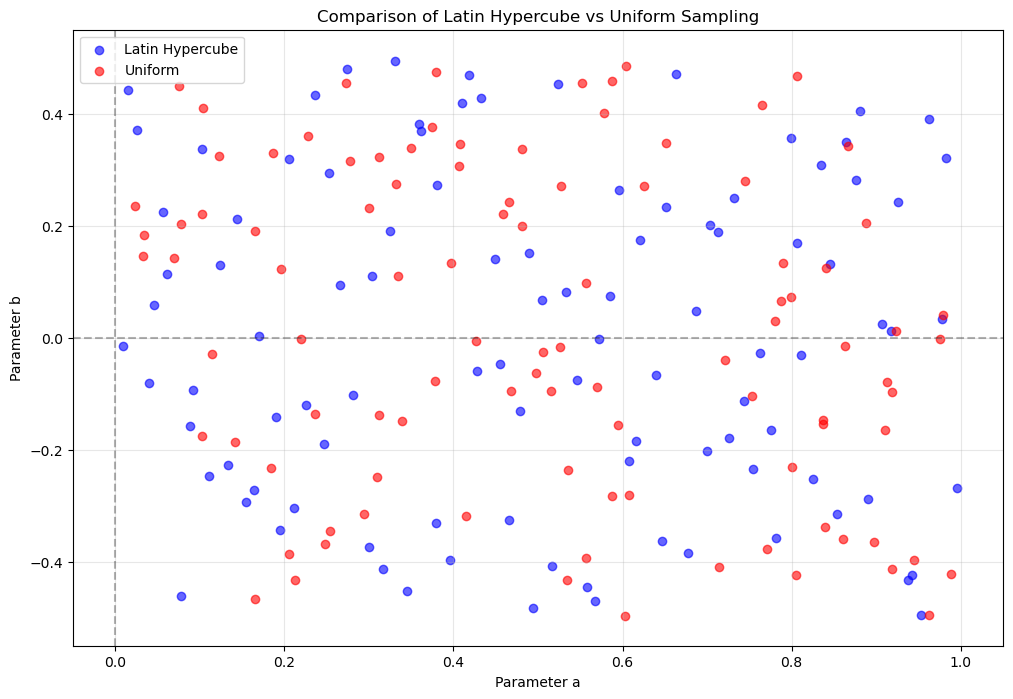

In [9]:
# Generate Latin Hypercube samples
n_samples = 100
lhs_samples = lhs(2, samples=n_samples)

# Scale LHS samples to desired ranges
a_lhs = lhs_samples[:, 0] * 1.0        # Scale to [0, 1]
b_lhs = lhs_samples[:, 1] * 1.0 - 0.5  # Scale to [-0.5, 0.5]

# Generate uniform samples
uniform_samples = np.random.uniform(0, 1, n_samples)
a_uniform = np.random.uniform(0, 1, n_samples)
b_uniform = np.random.uniform(-0.5, 0.5, n_samples)

# Create scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(a_lhs, b_lhs, c='blue', alpha=0.6, label='Latin Hypercube')
plt.scatter(a_uniform, b_uniform, c='red', alpha=0.6, label='Uniform')

plt.xlabel('Parameter a')
plt.ylabel('Parameter b')
plt.title('Comparison of Latin Hypercube vs Uniform Sampling')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left')

# Add range indicators
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)

# Set axis limits with padding
plt.xlim(-0.05, 1.05)
plt.ylim(-0.55, 0.55)
plt.show()

Grid Coverage Analysis:
LHS Coverage: 0.650
Uniform Coverage: 0.650

Nearest Neighbor Statistics:

LHS:
mean: 0.055
std: 0.027
min: 0.009
max: 0.166

Uniform:
mean: 0.053
std: 0.026
min: 0.009
max: 0.126


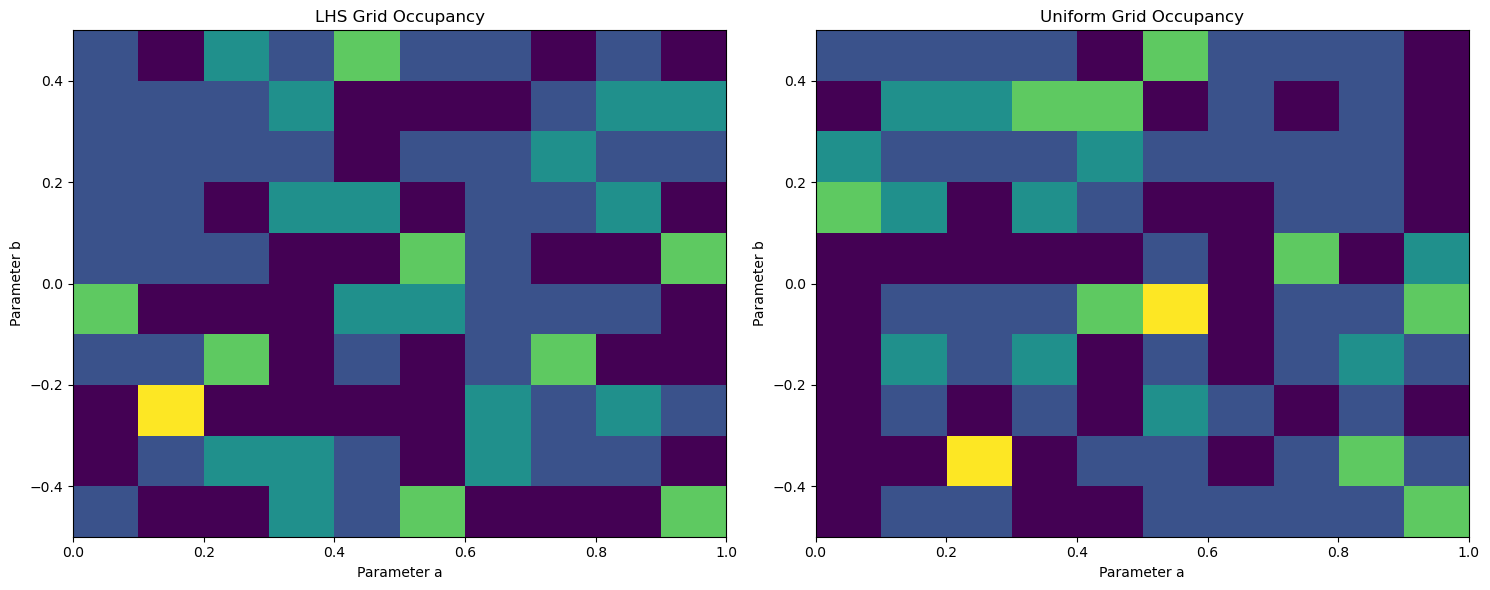

In [10]:
def analyze_sampling_methods(a_lhs, b_lhs, a_uniform, b_uniform, n_grid=10):
    # Combine coordinates into point arrays
    lhs_points = np.column_stack((a_lhs, b_lhs))
    uniform_points = np.column_stack((a_uniform, b_uniform))
    
    def compute_grid_coverage(points, n_grid):
        """Compute the number of occupied cells in a grid"""
        hist, _, _ = np.histogram2d(points[:, 0], points[:, 1], 
                                  bins=n_grid, 
                                  range=[[0, 1], [-0.5, 0.5]])
        return np.sum(hist > 0) / (n_grid * n_grid)
    
    def compute_nearest_neighbor_stats(points):
        """Compute statistics of nearest neighbor distances"""
        tree = cKDTree(points)
        distances, _ = tree.query(points, k=2)  # k=2 to get nearest neighbor
        return {
            'mean': np.mean(distances[:, 1]),
            'std': np.std(distances[:, 1]),
            'min': np.min(distances[:, 1]),
            'max': np.max(distances[:, 1])
        }
    
    # Compute metrics
    lhs_coverage = compute_grid_coverage(lhs_points, n_grid)
    uniform_coverage = compute_grid_coverage(uniform_points, n_grid)
    
    lhs_nn_stats = compute_nearest_neighbor_stats(lhs_points)
    uniform_nn_stats = compute_nearest_neighbor_stats(uniform_points)
    
    # Print results
    print("Grid Coverage Analysis:")
    print(f"LHS Coverage: {lhs_coverage:.3f}")
    print(f"Uniform Coverage: {uniform_coverage:.3f}")
    print("\nNearest Neighbor Statistics:")
    print("\nLHS:")
    for key, value in lhs_nn_stats.items():
        print(f"{key}: {value:.3f}")
    print("\nUniform:")
    for key, value in uniform_nn_stats.items():
        print(f"{key}: {value:.3f}")
    
    # Visualize the grid occupancy
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot LHS grid occupancy
    hist_lhs, xedges, yedges = np.histogram2d(lhs_points[:, 0], lhs_points[:, 1], 
                                             bins=n_grid, range=[[0, 1], [-0.5, 0.5]])
    ax1.imshow(hist_lhs.T, origin='lower', extent=[0, 1, -0.5, 0.5], aspect='auto')
    ax1.set_title('LHS Grid Occupancy')
    ax1.set_xlabel('Parameter a')
    ax1.set_ylabel('Parameter b')
    
    # Plot Uniform grid occupancy
    hist_uniform, _, _ = np.histogram2d(uniform_points[:, 0], uniform_points[:, 1], 
                                      bins=n_grid, range=[[0, 1], [-0.5, 0.5]])
    ax2.imshow(hist_uniform.T, origin='lower', extent=[0, 1, -0.5, 0.5], aspect='auto')
    ax2.set_title('Uniform Grid Occupancy')
    ax2.set_xlabel('Parameter a')
    ax2.set_ylabel('Parameter b')
    
    plt.tight_layout()
    plt.show()

# Run the analysis
from scipy.spatial import cKDTree
analyze_sampling_methods(a_lhs, b_lhs, a_uniform, b_uniform)

# Question 11

Create the interpolator over the parameter space \((a, b)\), interpolating over samples of the function evaluated at the original time grid \(t\).

As you will realize, we are dealing with an irregular grid and need the `griddata` method ([doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html)).

---

# Question 12

Show results with a sliding scale plot for \(a\) and \(b\).

On a different sliding bar plot, show the ratio between the interpolated values and the true values of the function evaluated at the original time grid \(t\).

- What do you observe?
- Does it make sense?

---

# Question 13

Compare memory and time of:
1. The original function call.
2. The interpolator call.

Comment.

---

In [11]:
from scipy.interpolate import griddata
import sys
import time

def create_ab_interpolator(a_samples, b_samples, n_time_points=100):
    # Time grid
    t = np.linspace(0, 1, n_time_points)
    
    # Create meshgrid for vectorized evaluation
    T, A = np.meshgrid(t, a_samples)
    _, B = np.meshgrid(t, b_samples)
    
    # Evaluate function for all samples at once
    f_values = f(T, A, B, c)
    
    # Create points array for griddata
    points = np.column_stack((a_samples, b_samples))
    
    def interpolate(a_new, b_new):
        # Create query point
        xi = np.array([[a_new, b_new]])
        
        # Interpolate all time points at once
        return griddata(points, f_values, xi, method='cubic')[0]
    
    return interpolate, t, sys.getsizeof(f_values) + sys.getsizeof(points)  # Return memory size

def plot_comparison(a_value, b_value):
    # Measure memory for interpolator
    interp_memory = interp_size  # Using stored interpolator size
    
    # Measure memory for original function
    t_mem = np.linspace(0, 1, 100)
    orig_result = f(t_mem, a_value, b_value, c)
    orig_memory = sys.getsizeof(t_mem) + sys.getsizeof(orig_result)
    
    # Time interpolation
    start_interp = time.perf_counter()
    f_interpolated = f_interp(a_value, b_value)
    interp_time = time.perf_counter() - start_interp
    
    # Time exact computation
    start_exact = time.perf_counter()
    f_exact = f(t, a_value, b_value, c)
    exact_time = time.perf_counter() - start_exact
    
    # Calculate ratio and error
    ratio = f_interpolated / f_exact
    error = np.abs(f_exact - f_interpolated)
    
    # Create figure with three subplots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12))
    
    # Plot comparison
    ax1.plot(t, f_exact, 'b-', label='Exact', linewidth=2)
    ax1.plot(t, f_interpolated, 'r--', label='Interpolated', linewidth=2)
    ax1.set_xlabel('Time $t$')
    ax1.set_ylabel('$f(t)$')
    ax1.set_title(f'Comparison for a={a_value:.3f}, b={b_value:.3f}\n'
                  f'Interp time: {interp_time*1000:.3f}ms, Exact time: {exact_time*1000:.3f}ms\n'
                  f'Interpolator memory: {interp_memory/1024:.2f}KB, Original function memory: {orig_memory/1024:.2f}KB')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot absolute error
    ax2.plot(t, error, 'g-', label='Absolute Error')
    ax2.fill_between(t, 0, error, alpha=0.3, color='g')
    ax2.set_xlabel('Time $t$')
    ax2.set_ylabel('Error')
    ax2.set_title(f'Maximum Error: {np.max(error):.2e}')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    # Plot ratio
    ax3.plot(t, ratio, 'r-', label='Interpolated/Exact Ratio')
    ax3.axhline(y=1, color='k', linestyle='--', alpha=0.5)
    ax3.set_xlabel('Time $t$')
    ax3.set_ylabel('Ratio')
    ax3.set_title('Ratio of Interpolated to Exact Values')
    ax3.grid(True, alpha=0.3)
    ax3.legend()
    
    plt.tight_layout()
    plt.show()

# Create optimized interpolator and get its memory size
f_interp, t, interp_size = create_ab_interpolator(a_lhs, b_lhs)

# Create interactive widgets
a_slider = widgets.FloatSlider(
    value=0.5,
    min=0,
    max=1,
    step=0.01,
    description='a:',
    continuous_update=False,
    style={'description_width': 'initial'}
)

b_slider = widgets.FloatSlider(
    value=0,
    min=-0.5,
    max=0.5,
    step=0.01,
    description='b:',
    continuous_update=False,
    style={'description_width': 'initial'}
)

# Create interactive plot
widgets.interactive(plot_comparison, a_value=a_slider, b_value=b_slider)

interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='a:', max=1.0, step=0.01, st…

# Question 14

Add a third parameter, \(c\), to our interpolation problem and repeat Questions 9 to 13.

For this parameter, use a range of \(5 < c < 10\).

Comment on the results.

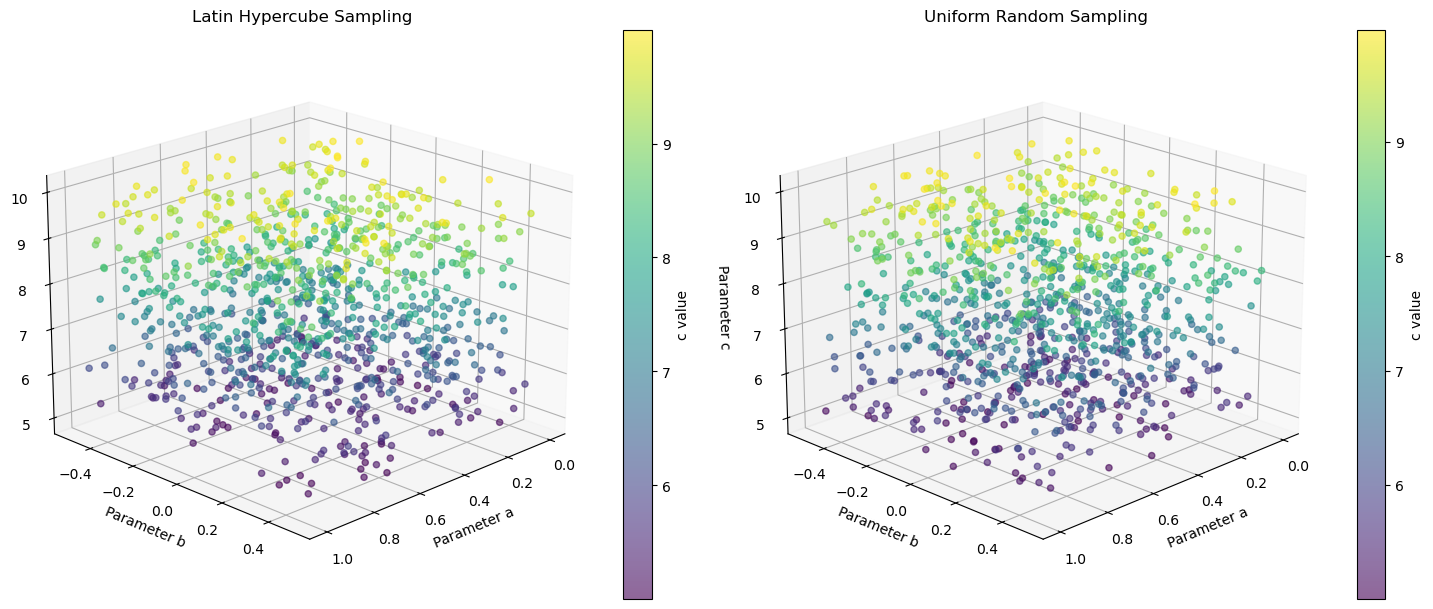

interactive(children=(FloatSlider(value=20.0, continuous_update=False, description='Elevation:', max=90.0, ste…

In [12]:
# Generate samples
n_samples = 1000

# LHS samples
lhs_samples = lhs(3, samples=n_samples)
a_lhs = lhs_samples[:, 0] * 1.0        # Scale to [0, 1]
b_lhs = lhs_samples[:, 1] * 1.0 - 0.5  # Scale to [-0.5, 0.5]
c_lhs = lhs_samples[:, 2] * 5.0 + 5.0  # Scale to [5, 10]

# Uniform samples
a_uniform = np.random.uniform(0, 1, n_samples)
b_uniform = np.random.uniform(-0.5, 0.5, n_samples)
c_uniform = np.random.uniform(5, 10, n_samples)

# Create 3D scatter plots
fig = plt.figure(figsize=(15, 6))

# LHS plot
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(a_lhs, b_lhs, c_lhs, 
                      c=c_lhs, cmap='viridis', 
                      alpha=0.6)
ax1.set_xlabel('Parameter a')
ax1.set_ylabel('Parameter b')
ax1.set_zlabel('Parameter c')
ax1.set_title('Latin Hypercube Sampling')
fig.colorbar(scatter1, ax=ax1, label='c value')

# Uniform plot
ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(a_uniform, b_uniform, c_uniform, 
                      c=c_uniform, cmap='viridis', 
                      alpha=0.6)
ax2.set_xlabel('Parameter a')
ax2.set_ylabel('Parameter b')
ax2.set_zlabel('Parameter c')
ax2.set_title('Uniform Random Sampling')
fig.colorbar(scatter2, ax=ax2, label='c value')

# Add grid lines
ax1.grid(True, alpha=0.3)
ax2.grid(True, alpha=0.3)

# Set consistent view angles
ax1.view_init(elev=20, azim=45)
ax2.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()

# Create interactive 3D plot with rotation capability
def create_interactive_3d_plot():
    fig = plt.figure(figsize=(15, 6))
    
    # LHS plot
    ax1 = fig.add_subplot(121, projection='3d')
    scatter1 = ax1.scatter(a_lhs, b_lhs, c_lhs, 
                          c=c_lhs, cmap='viridis', 
                          alpha=0.6)
    ax1.set_xlabel('Parameter a')
    ax1.set_ylabel('Parameter b')
    ax1.set_zlabel('Parameter c')
    ax1.set_title('Latin Hypercube Sampling')
    fig.colorbar(scatter1, ax=ax1, label='c value')
    
    # Uniform plot
    ax2 = fig.add_subplot(122, projection='3d')
    scatter2 = ax2.scatter(a_uniform, b_uniform, c_uniform, 
                          c=c_uniform, cmap='viridis', 
                          alpha=0.6)
    ax2.set_xlabel('Parameter a')
    ax2.set_ylabel('Parameter b')
    ax2.set_zlabel('Parameter c')
    ax2.set_title('Uniform Random Sampling')
    fig.colorbar(scatter2, ax=ax2, label='c value')
    
    # Add grid lines
    ax1.grid(True, alpha=0.3)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig, ax1, ax2

# Create sliders for rotation
elev_slider = widgets.FloatSlider(
    value=20,
    min=0,
    max=90,
    step=5,
    description='Elevation:',
    continuous_update=False
)

azim_slider = widgets.FloatSlider(
    value=45,
    min=0,
    max=360,
    step=5,
    description='Azimuth:',
    continuous_update=False
)

def update_view(elev, azim):
    fig, ax1, ax2 = create_interactive_3d_plot()
    ax1.view_init(elev=elev, azim=azim)
    ax2.view_init(elev=elev, azim=azim)
    plt.show()

widgets.interactive(update_view, elev=elev_slider, azim=azim_slider)

In [13]:
# Generate Latin Hypercube samples for 3 parameters
n_samples = 1000  # Increased samples for 3D space
samples = lhs(3, samples=n_samples)

# Scale samples to their respective ranges
a_samples = samples[:, 0] * 1.0        # Scale to [0, 1]
b_samples = samples[:, 1] * 1.0 - 0.5  # Scale to [-0.5, 0.5]
c_samples = samples[:, 2] * 5.0 + 5.0  # Scale to [5, 10]

def create_abc_interpolator(a_samples, b_samples, c_samples, n_time_points=100):
    # Time grid
    t = np.linspace(0, 1, n_time_points)
    
    # Create meshgrid for vectorized evaluation
    T = np.tile(t, (len(a_samples), 1))
    
    # Evaluate function for all samples at once
    f_values = f(T, a_samples[:, np.newaxis], 
                b_samples[:, np.newaxis], 
                c_samples[:, np.newaxis])
    
    # Create points array for griddata
    points = np.column_stack((a_samples, b_samples, c_samples))
    
    def interpolate(a_new, b_new, c_new):
        # Create query point
        xi = np.array([[a_new, b_new, c_new]])
        
        # Interpolate all time points at once using linear interpolation
        return griddata(points, f_values, xi, method='linear')[0]
    
    return interpolate, t, sys.getsizeof(f_values) + sys.getsizeof(points)

def plot_comparison_3d(a_value, b_value, c_value):
    # Measure memory for interpolator
    interp_memory = interp_size
    
    # Measure memory for original function
    t_mem = np.linspace(0, 1, 100)
    orig_result = f(t_mem, a_value, b_value, c_value)
    orig_memory = sys.getsizeof(t_mem) + sys.getsizeof(orig_result)
    
    # Time interpolation
    start_interp = time.perf_counter()
    f_interpolated = f_interp(a_value, b_value, c_value)
    interp_time = time.perf_counter() - start_interp
    
    # Time exact computation
    start_exact = time.perf_counter()
    f_exact = f(t, a_value, b_value, c_value)
    exact_time = time.perf_counter() - start_exact
    
    # Calculate ratio and error
    ratio = f_interpolated / f_exact
    error = np.abs(f_exact - f_interpolated)
    
    # Create figure with three subplots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12))
    
    # Plot comparison
    ax1.plot(t, f_exact, 'b-', label='Exact', linewidth=2)
    ax1.plot(t, f_interpolated, 'r--', label='Interpolated', linewidth=2)
    ax1.set_xlabel('Time $t$')
    ax1.set_ylabel('$f(t)$')
    ax1.set_title(f'Comparison for a={a_value:.3f}, b={b_value:.3f}, c={c_value:.3f}\n'
                  f'Interp time: {interp_time*1000:.3f}ms, Exact time: {exact_time*1000:.3f}ms\n'
                  f'Interpolator memory: {interp_memory/1024:.2f}KB, Original memory: {orig_memory/1024:.2f}KB')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot absolute error
    ax2.plot(t, error, 'g-', label='Absolute Error')
    ax2.fill_between(t, 0, error, alpha=0.3, color='g')
    ax2.set_xlabel('Time $t$')
    ax2.set_ylabel('Error')
    ax2.set_title(f'Maximum Error: {np.max(error):.2e}')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    # Plot ratio
    ax3.plot(t, ratio, 'r-', label='Interpolated/Exact Ratio')
    ax3.axhline(y=1, color='k', linestyle='--', alpha=0.5)
    ax3.set_xlabel('Time $t$')
    ax3.set_ylabel('Ratio')
    ax3.set_title('Ratio of Interpolated to Exact Values')
    ax3.grid(True, alpha=0.3)
    ax3.legend()
    
    plt.tight_layout()
    plt.show()

# Create interpolator
f_interp, t, interp_size = create_abc_interpolator(a_samples, b_samples, c_samples)

# Create interactive widgets
a_slider = widgets.FloatSlider(
    value=0.5, min=0, max=1, step=0.01,
    description='a:', continuous_update=False,
    style={'description_width': 'initial'}
)

b_slider = widgets.FloatSlider(
    value=0, min=-0.5, max=0.5, step=0.01,
    description='b:', continuous_update=False,
    style={'description_width': 'initial'}
)

c_slider = widgets.FloatSlider(
    value=7.5, min=5, max=10, step=0.1,
    description='c:', continuous_update=False,
    style={'description_width': 'initial'}
)

# Create interactive plot
widgets.interactive(plot_comparison_3d, 
                   a_value=a_slider, 
                   b_value=b_slider,
                   c_value=c_slider)

interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='a:', max=1.0, step=0.01, st…

Memory usage and time running of the interpolator increases very quickly with the number of parameters. Note that here we change to linear interpolation, as cubic interpolation is not possible due to the irregular grid. 

# Question 15

Instead of interpolating with the `griddata` method, use:
1. A Gaussian process.
2. A neural network whose output layer is the function predicted at the \(10^2\) points of the time grid and input layer is \(a, b, c\) values.

What do you observe in terms of:
- (i) Time.
- (ii) Memory.

Comment on scalability in all cases covered.


In [18]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
from tensorflow import keras
import numpy as np
import time
import sys

def create_and_compare_interpolators(a_samples, b_samples, c_samples, n_time_points=100):
    """Create and compare different interpolation methods"""
    
    # Prepare data
    t = np.linspace(0, 1, n_time_points)
    X = np.column_stack((a_samples, b_samples, c_samples))
    
    # Normalize inputs based on known bounds
    X_norm = np.column_stack([
        a_samples,  # already in [0,1]
        (b_samples + 0.5),  # map [-0.5,0.5] to [0,1]
        (c_samples - 5)/5  # map [5,10] to [0,1]
    ])
    
    # Generate output data
    Y = np.array([f(t, a, b, c) for a, b, c in zip(a_samples, b_samples, c_samples)])
    
    # 1. Gaussian Process
    start_time_gp = time.perf_counter()
    
    # Single GP with optimized kernel
    kernel = ConstantKernel(1.0) * RBF(
        length_scale=[0.5, 0.5, 0.5],
        length_scale_bounds=(1e-1, 2.0)
    )
    
    gp = GaussianProcessRegressor(
        kernel=kernel,
        n_restarts_optimizer=3,
        random_state=42,
        normalize_y=True
    )
    
    # Reshape Y for GP training
    Y_reshaped = Y.reshape(len(a_samples), -1)
    gp.fit(X_norm, Y_reshaped)
    gp_train_time = time.perf_counter() - start_time_gp
    
    # 2. Neural Network
    start_time_nn = time.perf_counter()
    
    model = keras.Sequential([
        keras.layers.InputLayer(input_shape=(3,)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(n_time_points)
    ])
    
    model.compile(optimizer='adam', loss='mse')
    
    # Train NN
    history = model.fit(
        X_norm, Y,
        epochs=100,
        verbose=0,
        batch_size=32
    )
    
    nn_train_time = time.perf_counter() - start_time_nn
    
    # Create prediction functions
    def predict_gp(a, b, c):
        x_new = np.array([[a, (b + 0.5), (c - 5)/5]])
        return gp.predict(x_new)[0].reshape(-1)
    
    def predict_nn(a, b, c):
        x_new = np.array([[a, (b + 0.5), (c - 5)/5]])
        return model.predict(x_new, verbose=0)[0]
    
    # Measure memory
    gp_size = sys.getsizeof(gp.kernel_) + sys.getsizeof(gp.X_train_)
    nn_size = sum(sys.getsizeof(w) for w in model.get_weights())
    
    # Test prediction time
    start = time.perf_counter()
    _ = predict_gp(0.5, 0, 7.5)
    gp_pred_time = time.perf_counter() - start
    
    start = time.perf_counter()
    _ = predict_nn(0.5, 0, 7.5)
    nn_pred_time = time.perf_counter() - start
    
    print(f"Training Times:")
    print(f"GP: {gp_train_time:.2f}s")
    print(f"NN: {nn_train_time:.2f}s")
    print(f"\nPrediction Times:")
    print(f"GP: {gp_pred_time*1000:.2f}ms")
    print(f"NN: {nn_pred_time*1000:.2f}ms")
    print(f"\nMemory Usage:")
    print(f"GP: {gp_size/1024:.2f}KB")
    print(f"NN: {nn_size/1024:.2f}KB")
    
    return predict_gp, predict_nn, t

# Create interpolators and get timing/memory info
gp_interp, nn_interp, t = create_and_compare_interpolators(a_lhs, b_lhs, c_lhs)

# Create visualization function
def plot_interpolation_comparison(a_value, b_value, c_value):
    # Get predictions
    start = time.perf_counter()
    f_gp = gp_interp(a_value, b_value, c_value)
    gp_time = time.perf_counter() - start
    
    start = time.perf_counter()
    f_nn = nn_interp(a_value, b_value, c_value)
    nn_time = time.perf_counter() - start
    
    # Get exact values
    start = time.perf_counter()
    f_exact = f(t, a_value, b_value, c_value)
    exact_time = time.perf_counter() - start
    
    # Plot results
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Function comparison
    ax1.plot(t, f_exact, 'k-', label='Exact', linewidth=2)
    ax1.plot(t, f_gp, 'r--', label=f'GP ({gp_time*1000:.1f}ms)', linewidth=2)
    ax1.plot(t, f_nn, 'b--', label=f'NN ({nn_time*1000:.1f}ms)', linewidth=2)
    ax1.set_title(f'Interpolation Comparison (a={a_value:.2f}, b={b_value:.2f}, c={c_value:.2f})')
    ax1.legend()
    ax1.grid(True)
    
    # Error comparison
    ax2.plot(t, np.abs(f_exact - f_gp), 'r-', label='GP Error', alpha=0.7)
    ax2.plot(t, np.abs(f_exact - f_nn), 'b-', label='NN Error', alpha=0.7)
    ax2.set_yscale('log')
    ax2.set_title('Absolute Error (log scale)')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

# Create interactive widgets
widgets.interactive(
    plot_interpolation_comparison,
    a_value=widgets.FloatSlider(0.5, min=0, max=1, step=0.01),
    b_value=widgets.FloatSlider(0, min=-0.5, max=0.5, step=0.01),
    c_value=widgets.FloatSlider(7.5, min=5, max=10, step=0.1)
)

/Users/congminhnguyen/miniconda/envs/myenv/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/congminhnguyen/miniconda/envs/myenv/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 1 of parameter k2__length_scale is close to the specified upper bound 2.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
2024-11-20 16:10:50.422969: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Training Times:
GP: 348.88s
NN: 1.80s

Prediction Times:
GP: 2.52ms
NN: 271.73ms

Memory Usage:
GP: 23.62KB
NN: 84.59KB


interactive(children=(FloatSlider(value=0.5, description='a_value', max=1.0, step=0.01), FloatSlider(value=0.0…